In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [6]:
df_train = pd.read_csv('data/chembl24_bert_train.csv')
df_test = pd.read_csv('data/chembl24_bert_test.csv')

In [7]:
df = pd.concat((df_train, df_test))
N = len(df)
print("N={}".format(N))
df.head()

N=1722270


,first,second,first_sp,second_sp,tanimoto
0,Cl.OC(=O)C1=CN(C2CC2)c3c(F)c(CNc4ccc(F)c(Cl)c4...,Cl.OC(=O)C1=CN(C2CC2)c3c(F)c(CNc4ccc(F)cc4)c(F...,NaN,NaN,0.813559
1,Cl.CCn1c(NCc2cc(OC)c(OC)c(OC)c2)nc3ccccc13,CCn1c(NCc2cc(OC)c(OC)c(OC)c2)nc3ccccc13,NaN,NaN,0.976744
2,CCOc1ccc(C[C@@H](NC(=O)c2cccs2)C(=N[C@@H](Cc3c...,CCOc1ccc(C[C@@H](NC(=O)c2ccncc2)C(=N[C@@H](Cc3...,NaN,NaN,0.797297
3,CC(C)n1ncc2C(N(C3=CN(C)C(=O)C(=C3)Cl)C(=O)c12)...,CC(C)n1nc(C)c2C(N(C3=CN(C)C(=O)C(=C3)Cl)C(=O)c...,NaN,NaN,0.706897
4,O[C@@H]1CCN(C1)S(=O)(=O)Nc2ccc(F)c(Nc3ncccc3c4...,Fc1ccc(NS(=O)(=O)N2CCCC2)c(F)c1Nc3ncccc3c4ncnc...,NaN,NaN,0.785714


In [8]:
smiles = df['first'].values
del df, df_train, df_test

In [53]:
def split(sm):
    arr = []
    i = 0
    while i < len(sm)-1:
        if not sm[i] in ['%', 'C', 'B', 'S', 'N', 'R', 'X', 'L', 'A', 'M', \
                         'T', 'Z', 's', 't', 'H', '+', '-', 'K', 'F']:
            arr.append(sm[i])
            i += 1
        elif sm[i]=='%':
            arr.append(sm[i:i+3])
            i += 3
        elif sm[i]=='C' and sm[i+1]=='l':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='C' and sm[i+1]=='a':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='C' and sm[i+1]=='u':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='B' and sm[i+1]=='r':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='B' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='B' and sm[i+1]=='a':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='B' and sm[i+1]=='i':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='S' and sm[i+1]=='i':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='S' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='S' and sm[i+1]=='r':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='N' and sm[i+1]=='a':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='N' and sm[i+1]=='i':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='R' and sm[i+1]=='b':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='R' and sm[i+1]=='a':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='X' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='L' and sm[i+1]=='i':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='A' and sm[i+1]=='l':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='A' and sm[i+1]=='s':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='A' and sm[i+1]=='g':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='A' and sm[i+1]=='u':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='M' and sm[i+1]=='g':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='M' and sm[i+1]=='n':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='T' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='Z' and sm[i+1]=='n':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='s' and sm[i+1]=='i':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='s' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='t' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='H' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='+' and sm[i+1]=='2':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='+' and sm[i+1]=='3':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='+' and sm[i+1]=='4':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='-' and sm[i+1]=='2':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='-' and sm[i+1]=='3':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='-' and sm[i+1]=='4':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='K' and sm[i+1]=='r':
            arr.append(sm[i:i+2])
            i += 2
        elif sm[i]=='F' and sm[i+1]=='e':
            arr.append(sm[i:i+2])
            i += 2
        else:
            arr.append(sm[i])
            i += 1
    if i == len(sm)-1:
        arr.append(sm[i])
    return arr

In [54]:
dic = {}
for sm in tqdm(smiles):
    arr = split(sm)
    for a in arr:
        if a not in dic.keys():
            dic[a] = 1
        else:
            dic[a] += 1

In [55]:
s = 0
for key, val in dic.items():
    s += val
print(s)

84494174


In [56]:
x, y = [], []
for key, val in sorted(dic.items(), key=lambda x: -x[1]):
    x.append(key)
    y.append(val)
    print(key, "{:.8f}".format(val/s*100))

c 23.55077523
C 17.99888712
( 9.32726675
) 9.32726675
O 5.89432000
= 4.08539410
1 4.03246856
N 3.91888913
2 3.83628580
3 3.13325863
n 2.35134555
4 1.84716759
@ 1.63334338
[ 1.58682775
] 1.58682775
H 1.14432268
F 0.85038763
5 0.72412093
S 0.55523118
\ 0.54692883
Cl 0.52343964
s 0.23074017
6 0.19696269
o 0.18616905
+ 0.15958260
- 0.13849949
# 0.13438796
/ 0.13227303
. 0.12374226
Br 0.10764648
7 0.04664227
P 0.03537167
I 0.01889716
8 0.01161500
Na 0.00840295
B 0.00344166
Si 0.00269131
Se 0.00219423
9 0.00214334
K 0.00132672
Li 0.00052666
+2 0.00034677
%10 0.00032665
As 0.00024617
p 0.00022960
Zn 0.00012900
Ca 0.00012900
Te 0.00011598
Mg 0.00008403
se 0.00005681
Al 0.00005326
te 0.00004852
+3 0.00003314
%11 0.00002604
Ag 0.00002485
Sr 0.00001657
+4 0.00001420
Ba 0.00001302
V 0.00001302
%12 0.00001184
Fe 0.00001065
Cu 0.00000828
-2 0.00000828
b 0.00000710
Mn 0.00000592
Ni 0.00000592
Rb 0.00000473
Xe 0.00000355
Ra 0.00000237
Kr 0.00000237
Be 0.00000237
-3 0.00000237
%13 0.00000237
Bi 0.00000

In [57]:
len(dic)

76

In [82]:
x, y = [], []
for key, val in sorted(dic.items(), key=lambda x: -x[1]):
    x.append(key)
    y.append(val)
    print(key, "{:.2f}".format(val/2))

c 9949516.50
C 7604005.50
( 3940498.50
) 3940498.50
O 2490178.50
= 1725960.00
1 1703600.50
N 1655616.50
2 1620719.00
3 1323710.50
n 993375.00
4 780374.50
@ 690040.00
[ 670388.50
] 670388.50
H 483443.00
F 359264.00
5 305920.00
S 234569.00
\ 231061.50
Cl 221138.00
s 97481.00
6 83211.00
o 78651.00
+ 67419.00
- 58512.00
# 56775.00
/ 55881.50
. 52277.50
Br 45477.50
7 19705.00
P 14943.50
I 7983.50
8 4907.00
Na 3550.00
B 1454.00
Si 1137.00
Se 927.00
9 905.50
K 560.50
Li 222.50
+2 146.50
%10 138.00
As 104.00
p 97.00
Zn 54.50
Ca 54.50
Te 49.00
Mg 35.50
se 24.00
Al 22.50
te 20.50
+3 14.00
%11 11.00
Ag 10.50
Sr 7.00
+4 6.00
Ba 5.50
V 5.50
%12 5.00
Fe 4.50
Cu 3.50
-2 3.50
b 3.00
Mn 2.50
Ni 2.50
Rb 2.00
Xe 1.50
Ra 1.00
Kr 1.00
Be 1.00
-3 1.00
%13 1.00
Bi 0.50
He 0.50
-4 0.50


In [79]:
s

84494174

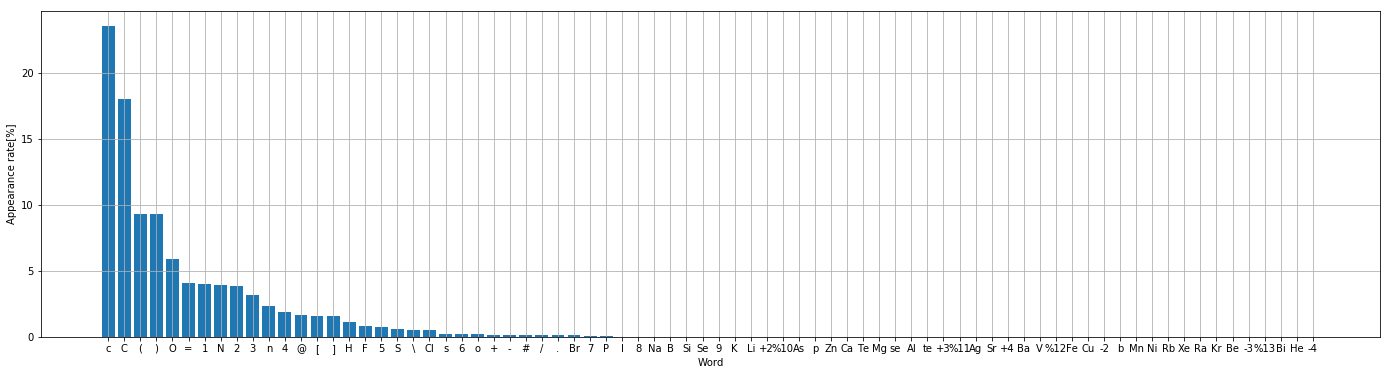

In [66]:
plt.figure(figsize=(24,6))
plt.bar(range(len(x)),np.array(y)/s*100, tick_label=x, align="center")
plt.xlabel("Word")
plt.ylabel("Appearance rate[%]")
plt.grid(True)
plt.show()

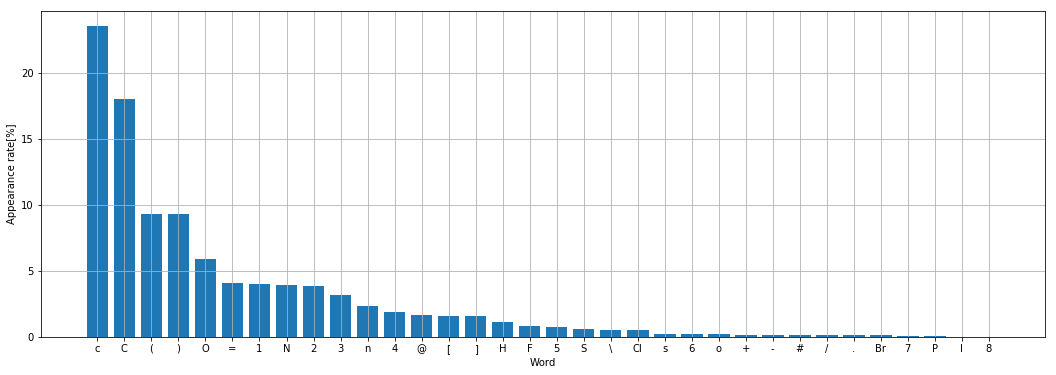

In [76]:
plt.figure(figsize=(18,6))
k = 34
plt.bar(range(k),np.array(y)[:k]/s*100, tick_label=x[:k], align="center")
plt.xlabel("Word")
plt.ylabel("Appearance rate[%]")
plt.grid(True)
plt.show()

In [83]:
a = [None]*4
a[0] = 1
a

[1, None, None, None]